In [1]:
#this is 
import torch
import torch.nn as nn
import torch.nn.functional as func
import torch.autograd as atgd
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

In [2]:
#loading training and testing data

batchsize = 16
Trainsize = 60000
Testsize = 10000

transform = transforms.Compose(
    [
    transforms.Resize((32,32)),    
    transforms.ToTensor(),
    ])

train_dataset = torchvision.datasets.MNIST(root = './data/mnist', 
                           train = True, 
                           transform = transform,
                           download = True) 
test_dataset = torchvision.datasets.MNIST(root = './data/mnist',
                           train = False,
                           transform = transform,
                           download = True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batchsize,
                                          shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batchsize,
                                          shuffle=True, num_workers=1)

print("The number of training images: ", Trainsize)
print("The number of testing images: ", Testsize)
print("Data load OK!")

The number of training images:  60000
The number of testing images:  10000
Data load OK!


In [3]:
#Network structure

# Network with 2 Conv2, 3fc
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16*5*5, 10)
        
    def forward(self, x):
        x = func.relu(self.conv1(x))
        self.after_conv1 = x
        x = self.pool(x)
        self.after_pool1 = x
        
        x = func.relu(self.conv2(x))
        self.after_conv2 = x
        x = self.pool(x)
        self.after_pool2 = x
        
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x

net = Net()
net = net.cuda()
print(net)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=10, bias=True)
)


In [4]:
#training process

epoch_num = 20
x1 = range(1,epoch_num+1)
x2 = range(1,epoch_num+1)
accuracy1 = []
accuracy2 = []
loss1 = []
loss2 = []

#the main training process 
for epoch in range(epoch_num): 
    for i, data in enumerate(train_loader, 0):
        
        if i >= Trainsize/batchsize:
            break        
        inputs, labels = data  
        
        inputs = inputs.cuda()
        labels = labels.cuda()
        
        optimizer.zero_grad()     
        outputs = net(inputs)
        train_loss = criterion(outputs, labels)
        train_loss.backward()
        optimizer.step()

    # training accuracy and loss
    print("epoch number %d" % (epoch + 1))
    
    correct = 0
    total = 0
    running_loss = 0
    for i, data in enumerate(train_loader, 0):
        if i >= Trainsize/batchsize:
            break
        
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = net(images)
        
        train_loss = criterion(outputs, labels)
        running_loss += train_loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += batchsize
        correct += (predicted == labels).sum().item()
       
    print('train_accuracy: %.3f %%' % (100 * correct / total))
    accuracy1.append(100 * correct / total)
    print("train_loss: %.3f" % (running_loss / Trainsize) )
    loss1.append(running_loss / Trainsize)
    
    # testing accuracy and loss
    correct = 0
    total = 0
    running_loss = 0
    for i, data in enumerate(test_loader, 0):
        if i >= Testsize/batchsize:
            break
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = net(images)
      
        
        test_loss = criterion(outputs, labels)
        running_loss += test_loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += batchsize
        correct += (predicted == labels).sum().item()
       
    print('test_accuracy: %.3f %%' % (100 * correct / total))
    accuracy2.append(100 * correct / total)
    print("test_loss: %.3f" % (running_loss / Testsize))
    loss2.append(running_loss / Testsize)

print("Training OK!")


epoch number 1
train_accuracy: 96.343 %
train_loss: 0.008
test_accuracy: 96.560 %
test_loss: 0.007
epoch number 2
train_accuracy: 97.592 %
train_loss: 0.005
test_accuracy: 97.830 %
test_loss: 0.004
epoch number 3
train_accuracy: 97.955 %
train_loss: 0.004
test_accuracy: 97.990 %
test_loss: 0.004
epoch number 4
train_accuracy: 98.033 %
train_loss: 0.004
test_accuracy: 97.920 %
test_loss: 0.004
epoch number 5
train_accuracy: 98.480 %
train_loss: 0.003
test_accuracy: 98.450 %
test_loss: 0.003
epoch number 6
train_accuracy: 98.660 %
train_loss: 0.003
test_accuracy: 98.560 %
test_loss: 0.003
epoch number 7
train_accuracy: 98.647 %
train_loss: 0.003
test_accuracy: 98.500 %
test_loss: 0.003
epoch number 8
train_accuracy: 98.762 %
train_loss: 0.003
test_accuracy: 98.550 %
test_loss: 0.003
epoch number 9
train_accuracy: 98.660 %
train_loss: 0.003
test_accuracy: 98.590 %
test_loss: 0.003
epoch number 10
train_accuracy: 98.867 %
train_loss: 0.002
test_accuracy: 98.710 %
test_loss: 0.002
epoch num

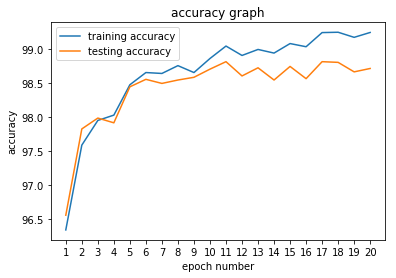

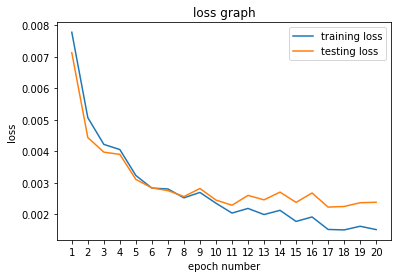

In [5]:
# visualize the result

plt.plot(x1, accuracy1, label="training accuracy")
plt.plot(x2, accuracy2, label="testing accuracy")
plt.xlabel("epoch number")
plt.xticks(np.linspace(1,epoch_num,epoch_num))
plt.ylabel("accuracy")
plt.title("accuracy graph")
plt.legend()
plt.show()



plt.plot(x1, loss1, label="training loss")
plt.plot(x2, loss2, label="testing loss")
plt.xlabel("epoch number")
plt.xticks(np.linspace(1,epoch_num,epoch_num))
plt.ylabel("loss")
plt.title("loss graph")
plt.legend()
plt.show()


In [6]:
# the acc for different numbers 

single_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                          shuffle=True, num_workers=2)
correct = [0.0]*10
total = [0.0]*10
for data in single_loader:
    images, labels = data 
    images = images.cuda()
    labels = labels.cuda()
    
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    total[labels] += 1
    correct[labels] += (predicted == labels).sum().item()  
    
num_acc = []
for i in range(10):
    num_acc.append(100*correct[i]  / total[i])
    print("test_acc: %.3f" % (100*correct[i]  / total[i]))

test_acc: 98.980
test_acc: 99.383
test_acc: 92.926
test_acc: 95.545
test_acc: 96.843
test_acc: 97.085
test_acc: 94.990
test_acc: 94.942
test_acc: 93.018
test_acc: 92.963


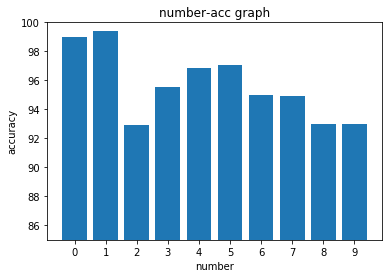

In [7]:
#visualize the result

num = range(0,10)
plt.bar(num, num_acc)

plt.xlabel("number")
plt.ylim((85,100))
plt.xticks(np.linspace(0,9,10))
plt.ylabel("accuracy")
plt.title("number-acc graph")

plt.show()

ground truth:  9 predicted result:  5


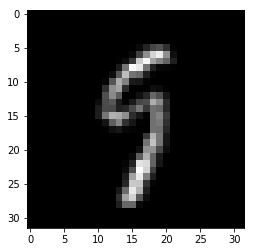

In [8]:
# find incorrect detection result

single_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                          shuffle=True, num_workers=2)


for data in single_loader:
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    
    
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    
    if predicted != labels:
        plt.imshow(images.squeeze(), cmap = "gray")
        print("ground truth: ", labels.item(), "predicted result: ", predicted.item())
        break
        

    


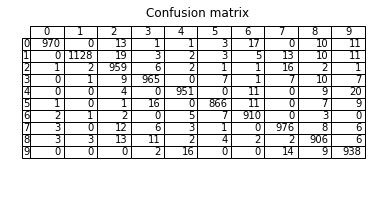

In [9]:
# output the confusion matrix 

single_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                          shuffle=True, num_workers=1)
cells = [([0]*10)for i in range(10)]

for data in single_loader:
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    cells[predicted.item()][labels.item()] += 1


labels_num = [i for i in range(10)]
predicted_num = [i for i in range(10)]


plt.subplot2grid((4,3), (0,0), colspan=5, rowspan=3)
plt.axis("off")
plt.table(rowLabels = predicted_num, colLabels = labels_num ,cellText = cells,loc="upper center",
         colWidths= [0.1]*10)
plt.title("Confusion matrix")
plt.show()


tensor([[ 3.2729, -4.7660, -3.1817,  3.4430, -0.3685,  7.7033, -1.5034,
          1.3722, -1.0027,  3.8426]], device='cuda:0')
torch.Size([1, 6, 28, 28])


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f18b6535da0>>
Traceback (most recent call last):
  File "/hdd/luke/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/hdd/luke/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/hdd/luke/anaconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/hdd/luke/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/hdd/luke/anaconda3/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/hdd/luke/anaconda3/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
 

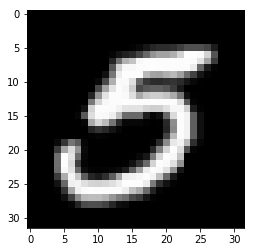

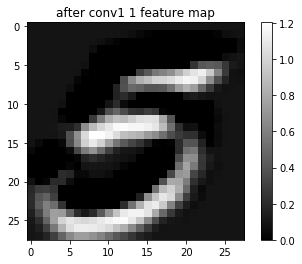

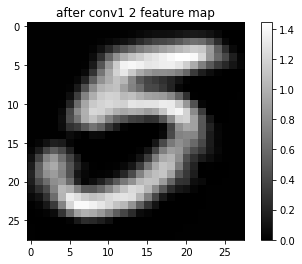

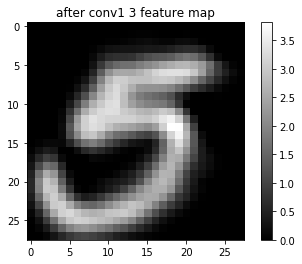

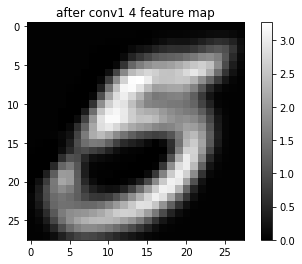

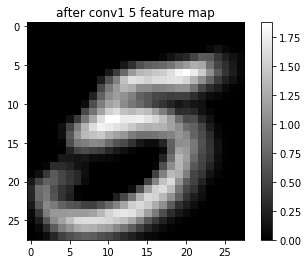

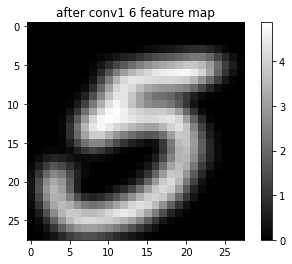

In [10]:
# output the hidden layers 
single_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                          shuffle=True, num_workers=1)


for data in single_loader:
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    
    plt.figure(0)
    plt.imshow((images.squeeze()), cmap = "gray")
    outputs = net(images)
    
#     plt.figure(1)
#     num = range(0,10)
#     plt.bar(num, outputs.squeeze().detach())
#     plt.show()
    
    print(outputs)
    print(net.after_conv1.size())
    
    for i in range(0,6):
        plt.figure(i+1)
        plt.title("after conv1 %d feature map" % (i+1))
        plt.imshow(net.after_conv1.squeeze().detach()[i], cmap = "gray")
        plt.colorbar()
    
#     for i in range(0,16):
#         plt.figure(i+9)
#         plt.title("after conv2 %d feature map" % (i+1))
#         plt.imshow(net.after_conv2.squeeze().detach()[i], cmap = "gray")
    
    break

In [16]:
#store the module in .mat file

weight = dict()
weight['conv1_w'] = net._modules['conv1']._parameters['weight'].data.cpu().numpy()
weight['conv2_w'] = net._modules['conv2']._parameters['weight'].data.cpu().numpy()
weight['fc_w'] = net._modules['fc1']._parameters['weight'].data.cpu().numpy()

weight['conv1_b'] = net._modules['conv1']._parameters['bias'].data.cpu().numpy()
weight['conv2_b'] = net._modules['conv2']._parameters['bias'].data.cpu().numpy()
weight['fc_b'] = net._modules['fc1']._parameters['bias'].data.cpu().numpy()

sio.savemat('mnist_module.mat', mdict=weight)

In [17]:
#testing for .mat file

data = sio.loadmat("mnist_module.mat") 
net._modules['conv1']._parameters['weight']
# net._modules['conv1']._parameters['bias']

Parameter containing:
tensor([[[[ 0.0321, -0.1005, -0.1270,  0.0705,  0.1379],
          [ 0.0153,  0.0878,  0.1211, -0.1839,  0.0757],
          [ 0.1131,  0.0045, -0.0302, -0.1259, -0.1410],
          [-0.1727, -0.1377,  0.1291, -0.1709, -0.0083],
          [-0.1630,  0.0717, -0.0055, -0.0032,  0.0398]]],


        [[[ 0.1914,  0.2847,  0.3375,  0.2255,  0.0453],
          [ 0.3689,  0.6830,  0.5522,  0.4774,  0.0211],
          [ 0.5264,  0.6953,  0.6348,  0.2095,  0.1002],
          [ 0.5268,  0.4467,  0.1955,  0.3404, -0.0039],
          [ 0.3600,  0.2458,  0.2198, -0.0459,  0.0589]]],


        [[[ 0.0045, -0.0448, -0.1052,  0.0044, -0.0920],
          [-0.0599, -0.1289, -0.1781, -0.1463,  0.1860],
          [ 0.0503, -0.0983,  0.0532,  0.0833,  0.0734],
          [-0.1106,  0.2508,  0.2672,  0.0451,  0.0831],
          [ 0.0228,  0.1805, -0.1209,  0.0625,  0.2966]]],


        [[[ 0.1850, -0.0368, -0.1814, -0.1407,  0.1710],
          [ 0.0014, -0.0038, -0.0743,  0.1271,  0.0003